In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dpdz = -4
R = 2
yield_stress = 0.1
mu = 4 * pow(10, -3)

In [3]:
def newtonian(r):
    return dpdz * (r**2 - R**2) / (4 * mu)

newtonian = np.vectorize(newtonian)

def bingham(r):
    if r < 0:
        r *= - 1
    return 2 * newtonian(r) - 2 * yield_stress * (r - R) / mu

bingham = np.vectorize(bingham)

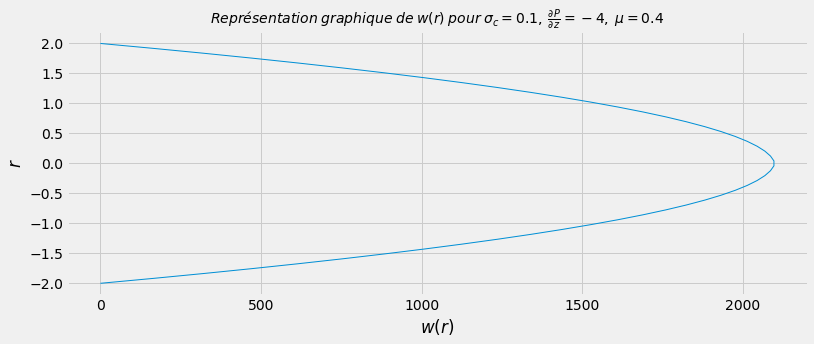

In [17]:
r = np.linspace(-R, R, 50)
with plt.style.context('fivethirtyeight'):
#     plt.plot(r, newtonian(r), label='Newtonian', linewidth=1)
    plt.plot(bingham(r), r, linewidth=1)
    plt.ylabel('$r$')
    plt.xlabel('$w(r)$')
#     plt.legend(framealpha=0.1, edgecolor='black', bbox_to_anchor=(1, 0.5))
    sp = r'\hspace{0.25}'
    frac = r'\frac{\partial P}{\partial z}'
    sig = r'\sigma_{c}'
    ttl = fr'$Représentation{sp}graphique{sp}de{sp}w(r){sp}pour{sp}{sig}=0.1,{sp}{frac}=-4,{sp}\mu=0.4$'
    plt.title(ttl, fontsize=14)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    plt.savefig('figs/w-bingham-poiseuil.png', transparent=True, dpi=100)

In [19]:
def output(dpdz):
    part_1 = -np.math.pi * dpdz * np.math.pow(R, 4) / (4 * mu)
    part_2 = 4 * np.math.pi * yield_stress * pow(R, 3) / (6 * mu)
    return part_1 + part_2

output = np.vectorize(output)

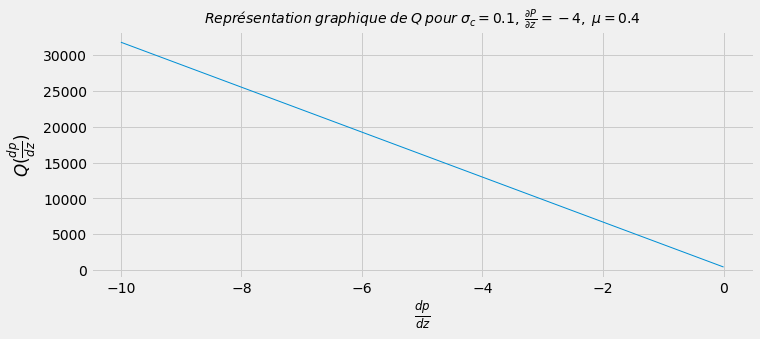

In [21]:
dp = np.linspace(-10, 0, 50)
with plt.style.context('fivethirtyeight'):
    plt.plot(dp, output(dp), linewidth=1)
    plt.xlabel(r'$\frac{dp}{dz}$')
    plt.ylabel(r'$Q(\frac{dp}{dz})$')
#     plt.legend(framealpha=0.1, edgecolor='black', bbox_to_anchor=(1, 0.5))
    sp = r'\hspace{0.25}'
    frac = r'\frac{\partial P}{\partial z}'
    sig = r'\sigma_{c}'
    ttl = fr'$Représentation{sp}graphique{sp}de{sp}Q{sp}pour{sp}{sig}=0.1,{sp}{frac}=-4,{sp}\mu=0.4$'
    plt.title(ttl, fontsize=14)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    plt.savefig('figs/q-bingham-poiseuil.png', transparent=True, dpi=100)